<a href="https://colab.research.google.com/github/tcy98/appliedMLp2/blob/main/Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

The dataset we have chosen to work with is the "Latest Covid 19 Dataset Worldwide", containing global COVID-19 numbers as well as a plethora of information about how the disease affected each country. The secondary dataset we will be merging with contains basic statistics for countries such as GDP,  income, employment numbers etc. With these two datasets, we plan to merge them to provide more context on how countries handled the pandemic based on their socioeconomic status. 

In [85]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/tcy98/colabDataStoreage/main/owid-covid-data.csv"
data = pd.read_csv(url)


#Questions 


1. Do wealthier countries have a better response to COVID-19 compared to less wealthy nations?
2. With countries that have higher population densities have higher amounts of COVID-19 cases?
3. Will developed countries deal with COVID-19 better or worse than undeveloped countries?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

#Data Types


In [86]:
data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [87]:
data.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
153168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
153169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
153170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [88]:
data.isnull().sum()

iso_code                                        0
continent                                    9228
location                                        0
date                                            0
total_cases                                  2650
                                            ...  
human_development_index                     27460
excess_mortality_cumulative_absolute       147938
excess_mortality_cumulative                147938
excess_mortality                           147938
excess_mortality_cumulative_per_million    147938
Length: 67, dtype: int64

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

In [89]:
data2 = data.groupby('location').max()
data3 = data2[['iso_code','continent','date','total_deaths','total_cases','total_cases_per_million','total_deaths_per_million','total_vaccinations','total_vaccinations_per_hundred','total_tests','total_boosters_per_hundred']]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,iso_code,continent,date,total_deaths,total_cases,total_cases_per_million,total_deaths_per_million,total_vaccinations,total_vaccinations_per_hundred,total_tests,total_boosters_per_hundred
location,,,,,,,,,,,
Afghanistan,AFG,Asia,2022-01-08,7369.0,158309.0,3974.076,184.986,4.674518e+06,11.73,NaN,NaN
Africa,OWID_AFR,NaN,2022-01-08,230615.0,10064115.0,7327.422,167.905,3.200930e+08,23.31,NaN,0.07
Albania,ALB,Europe,2022-01-08,3233.0,214905.0,74803.320,1125.330,2.367574e+06,82.41,737014.0,5.35
Algeria,DZA,Africa,2022-01-08,6330.0,221742.0,4969.941,141.875,1.254536e+07,28.12,NaN,0.06
Andorra,AND,Europe,2022-01-08,141.0,26408.0,341391.525,1822.789,1.172460e+05,151.57,275127.0,11.03
...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,WLF,Oceania,2022-01-08,7.0,454.0,40923.021,630.972,1.193900e+04,107.62,NaN,NaN
World,OWID_WRL,NaN,2022-01-08,5484782.0,305191603.0,38754.658,696.483,9.421129e+09,119.63,NaN,9.87
Yemen,YEM,Asia,2022-01-08,1986.0,10178.0,333.807,65.135,7.860270e+05,2.58,NaN,NaN


### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

**Discussion**: The original dataset contains mostly covid realted information of a country. Thus, we decided to bring up another dataset containing other general information for each country from UNData: Country Statistics: https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles

Our strategy is to merge these two datasets using the country name. We decided to do a inner join since the original data contain region data such as "Asia" and the UNData also includes some countries that not included in original dataset.

In [90]:
merge_url = "https://raw.githubusercontent.com/tcy98/colabDataStoreage/main/country_profile_variables.csv"
merge_data = pd.read_csv(merge_url)
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

In [91]:
combine_dataset = pd.merge(data3, merge_data, left_on='location', right_on='country')
combine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 61 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   iso_code                                                    191 non-null    object 
 1   continent                                                   191 non-null    object 
 2   date                                                        191 non-null    object 
 3   total_deaths                                                176 non-null    float64
 4   total_cases                                                 185 non-null    float64
 5   total_cases_per_million                                     185 non-null    float64
 6   total_deaths_per_million                                    176 non-null    float64
 7   total_vaccinations                                          187 non-null    float64
 8   

In [92]:
combine_dataset.head(20)[["country","iso_code"]]

,country,iso_code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Andorra,AND
4,Angola,AGO
5,Anguilla,AIA
6,Antigua and Barbuda,ATG
7,Argentina,ARG
8,Armenia,ARM
9,Aruba,ABW


Here, since country is from merge data and iso_code is from original data, we can see that it is properly merged 

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

We are interested in finding varibles realted to mortality rate (total_deaths_per_million). I choose these varibles exploring the relationship: (total_vaccinations_per_hundred,total_boosters_per_hundred,total_cases_per_million, Population density,CO2 emission estimates,Education: Government expenditure,Infant mortality rate).

Some of the varibles I choose are covid related while other varibles could somewhat indicate the level of development of one country and we want to see if that could be related to mortality rate of COVID-19

In [93]:
data_selected = combine_dataset[["country","total_deaths_per_million","total_vaccinations_per_hundred","total_boosters_per_hundred","total_cases_per_million", "Population density (per km2, 2017)","CO2 emission estimates (million tons/tons per capita)","Education: Government expenditure (% of GDP)","Infant mortality rate (per 1000 live births"]]

data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                191 non-null    object 
 1   total_deaths_per_million                               176 non-null    float64
 2   total_vaccinations_per_hundred                         187 non-null    float64
 3   total_boosters_per_hundred                             85 non-null     float64
 4   total_cases_per_million                                185 non-null    float64
 5   Population density (per km2, 2017)                     191 non-null    float64
 6   CO2 emission estimates (million tons/tons per capita)  191 non-null    int64  
 7   Education: Government expenditure (% of GDP)           191 non-null    object 
 8   Infant mortality rate (per 1000 live births        

In [94]:
temp_col = pd.to_numeric(data_selected['Education: Government expenditure (% of GDP)'], errors='coerce')
temp_col[temp_col <0] = np.NaN
data_selected = data_selected.assign(newEdu=temp_col)

In [95]:
temp_col = pd.to_numeric(data_selected['Infant mortality rate (per 1000 live births'], errors='coerce')
temp_col[temp_col <0] = np.NaN
data_selected = data_selected.assign(newInfant=temp_col)

In [96]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                191 non-null    object 
 1   total_deaths_per_million                               176 non-null    float64
 2   total_vaccinations_per_hundred                         187 non-null    float64
 3   total_boosters_per_hundred                             85 non-null     float64
 4   total_cases_per_million                                185 non-null    float64
 5   Population density (per km2, 2017)                     191 non-null    float64
 6   CO2 emission estimates (million tons/tons per capita)  191 non-null    int64  
 7   Education: Government expenditure (% of GDP)           191 non-null    object 
 8   Infant mortality rate (per 1000 live births       

From data info, we see that total bosster per hundred have only 85 non-null count, possibly due to it's a new varible. Also, government expenditure and infant mortality rate are object type with some bad data such as -99 and "...". We will convert it to NaN. 

In [97]:
import seaborn as sns


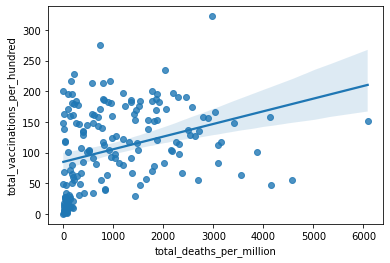

In [99]:
sns.regplot(x=data_selected.iloc[:,1],y=data_selected.iloc[:,2])

From this plot, we see that higher death rate positively realted to higher vacination rate. This is not as we predicted but it could be explained since more deaths in the country will encourge more people to get vaccinated. 

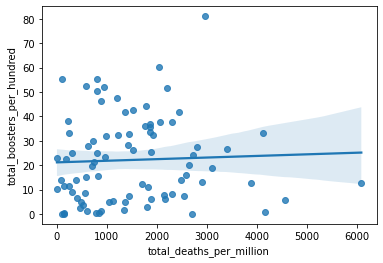

In [100]:
sns.regplot(x=data_selected.iloc[:,1],y=data_selected.iloc[:,3])

The above graphs show that there are no clear trend and relationship between mortality rate and booster stats. 

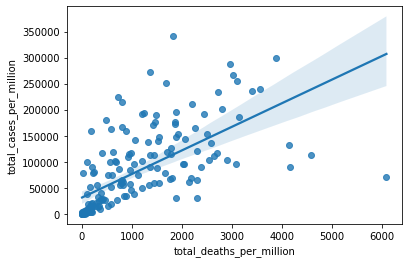

In [101]:
sns.regplot(x=data_selected.iloc[:,1],y=data_selected.iloc[:,4])

The graph bewteen death per million and cases per million shows a clear positive relation, which is as we predicted. More cases lead to more deaths.

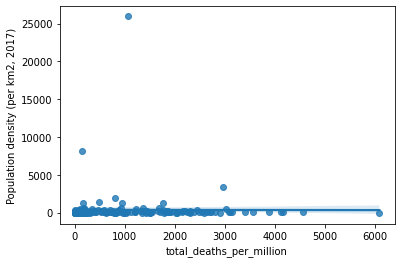

In [102]:
sns.regplot(x=data_selected.iloc[:,1],y=data_selected.iloc[:,5])

Nothing can be seen from the original data since the outliers. Let's limit the range of population density and see what happens.

In [103]:
data_selected.nlargest(7,"Population density (per km2, 2017)")

,country,total_deaths_per_million,total_vaccinations_per_hundred,total_boosters_per_hundred,total_cases_per_million,"Population density (per km2, 2017)",CO2 emission estimates (million tons/tons per capita),Education: Government expenditure (% of GDP),Infant mortality rate (per 1000 live births,newEdu,newInfant
112,Monaco,1062.753,126.47,NaN,141523.279,25969.8,-99,1.0,-99,1.0,NaN
156,Singapore,153.477,217.00,11.41,52222.752,8155.5,27,2.9,2.1,2.9,2.1
67,Gibraltar,2968.152,322.27,81.03,288444.985,3457.1,-99,-99,-99,NaN,NaN
14,Bahrain,799.064,186.95,50.31,166378.100,1963.9,961,2.7,6.9,2.7,6.9
105,Maldives,485.633,145.74,5.02,179662.264,1454.4,0,5.2,9.0,5.2,9.0
107,Malta,943.616,217.60,52.13,115913.583,1346.4,1,7.8,4.8,7.8,4.8
15,Bangladesh,168.962,79.54,NaN,9574.116,1265.0,1438,1.9,33.3,1.9,33.3


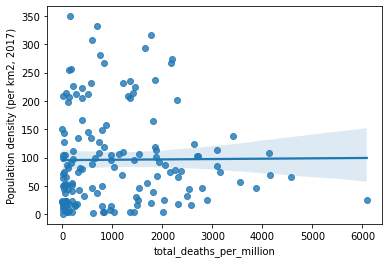

In [104]:
temp_data = data_selected[data_selected["Population density (per km2, 2017)"]<350]
sns.regplot(x=temp_data.iloc[:,1],y=temp_data.iloc[:,5])

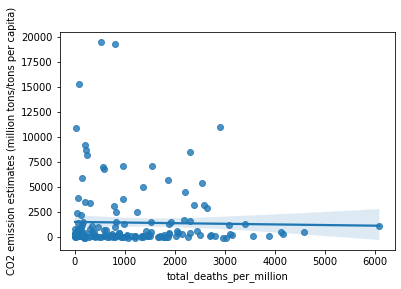

In [105]:
temp_data2 = data_selected[data_selected["CO2 emission estimates (million tons/tons per capita)"]<20000]
sns.regplot(x=temp_data2.iloc[:,1],y=temp_data2.iloc[:,6])

No clear relation between them.

In [106]:
data_selected.nlargest(7,"CO2 emission estimates (million tons/tons per capita)")

,country,total_deaths_per_million,total_vaccinations_per_hundred,total_boosters_per_hundred,total_cases_per_million,"Population density (per km2, 2017)",CO2 emission estimates (million tons/tons per capita),Education: Government expenditure (% of GDP),Infant mortality rate (per 1000 live births,newEdu,newInfant
37,China,3.212,200.40,22.92,71.748,150.1,101394,-99,11.6,NaN,11.6
151,Saudi Arabia,251.608,148.46,11.44,16278.493,15.3,25904,...,13.0,NaN,13.0
79,India,347.199,108.22,NaN,25497.182,450.4,23103,3.8,41.3,3.8,41.3
80,Indonesia,521.516,103.54,NaN,15435.079,145.7,19481,3.6,25.0,3.6,25.0
32,Canada,807.819,186.47,25.19,65856.723,4.0,19276,5.3,4.7,5.3,4.7
10,Australia,91.747,170.57,13.83,37709.354,3.2,15282,5.2,3.9,5.2,3.9
25,Brazil,2895.668,155.91,13.18,104340.824,25.0,10948,6.0,15.8,6.0,15.8


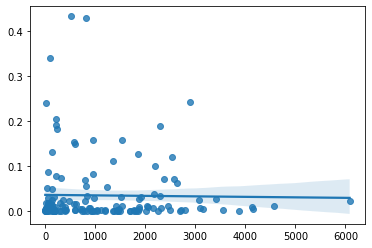

In [107]:
from sklearn import preprocessing
data_temp= data_selected[data_selected["CO2 emission estimates (million tons/tons per capita)"]<20000]
data_temp= data_temp[data_temp["CO2 emission estimates (million tons/tons per capita)"]>0]
x_array = np.array(data_temp["CO2 emission estimates (million tons/tons per capita)"])
y_array = np.array(data_temp["total_deaths_per_million"])
normalized_arr = preprocessing.normalize([x_array])
sns.regplot(x=y_array,y=normalized_arr)

Even after normalize, it is hard to see a trend. 

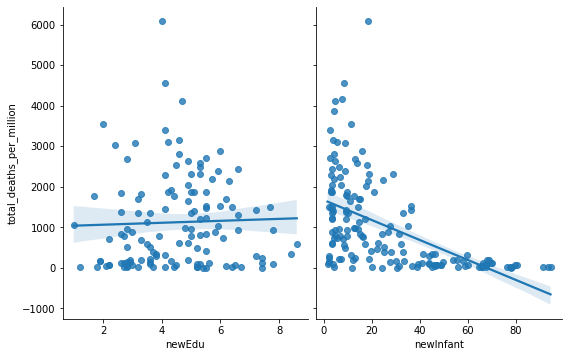

In [111]:
sns.pairplot(data_selected,x_vars = ["newEdu","newInfant"]
             ,y_vars = ["total_deaths_per_million"],height=5, aspect=.8,kind = "reg")

In [113]:
data_selected.nlargest(7,"newInfant")

,country,total_deaths_per_million,total_vaccinations_per_hundred,total_boosters_per_hundred,total_cases_per_million,"Population density (per km2, 2017)",CO2 emission estimates (million tons/tons per capita),Education: Government expenditure (% of GDP),Infant mortality rate (per 1000 live births,newEdu,newInfant
155,Sierra Leone,15.231,11.35,NaN,909.555,104.7,53,2.7,94.4,2.7,94.4
34,Central African Republic,20.529,17.39,NaN,2531.308,7.5,19,1.2,93.5,1.2,93.5
35,Chad,10.878,2.17,NaN,365.652,11.8,288,2.8,91.2,2.8,91.2
73,Guinea-Bissau,73.927,20.55,NaN,3321.277,66.2,25,2.2,80.4,2.2,80.4
161,Somalia,81.604,9.20,NaN,1482.992,23.5,129,-99,79.5,NaN,79.5
106,Mali,32.173,5.74,NaN,1149.804,15.2,55,3.7,78.5,3.7,78.5
29,Burundi,3.101,0.07,NaN,2833.193,423.1,56,5.4,77.8,5.4,77.8


Here, we are trying to see if the 


*   Education: Government expenditure (% of GDP)
*   Infant mortality rate (per 1000 live births)

There is no clear trend between government expenditure on education and covid mortality rate. However, it shows a trend that countries with high infant mortality rate have low covid morality rate. This is counter our prediction since we thought high infant mortality rate means poor and underdeveloped hospital system. 

Looking at the top few counties, they are very small poor country with very few covid cases reported. Thus, there might be a lack of report in the covid data. 


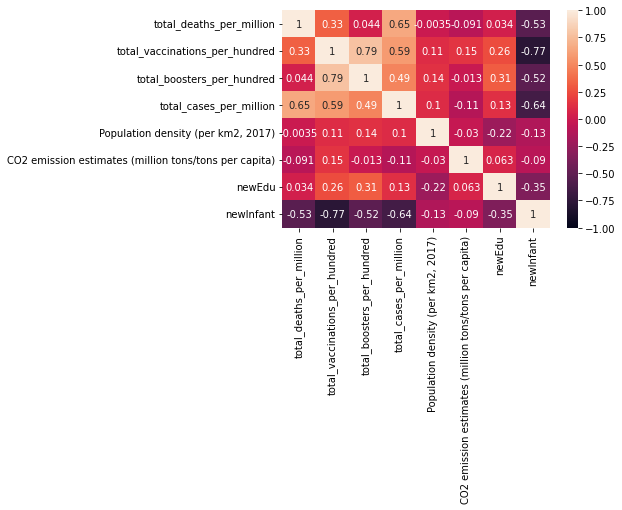

In [112]:
heatmap = sns.heatmap(data_selected.corr(), vmin=-1, vmax=1, annot=True)

And here is a heat map showing some corrlation we discovered above. 